In [107]:
import pandas as pd
import matplotlib.pyplot as plt
apple = pd.read_csv("apple_clean.csv")
google = pd.read_csv("google_clean.csv")
overlap = pd.read_csv("overlapping_apps.csv")

In [108]:
apple = apple.add_suffix('_apple')
apple = apple.rename(columns={'name_apple':'name'})
apple = apple.drop(columns="Unnamed: 0_apple")
apple.head()

,name,size_apple,price_apple,reviews_apple,rating_apple,category_apple,profit_apple
0,PAC-MAN Premium,100.788224,3.99,21292,4.0,Games,84955.08
1,Evernote - stay organized,158.578688,0.00,161065,4.0,Productivity,0.00
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,0.00,188583,3.5,Weather,0.00
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,0.00,262241,4.0,Shopping,0.00
4,Bible,92.774400,0.00,985920,4.5,Reference,0.00


In [109]:
google = google.add_suffix('_google')
google = google.rename(columns={'name_google':'name'})
google = google.drop(columns="Unnamed: 0_google")
google.head()

,name,size_google,price_google,reviews_google,rating_google,cateogory_google,installs_google,profit_google
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,159.0,4.1,ART_AND_DESIGN,10000.0,0.0
1,Coloring book moana,14.0,0.0,967.0,3.9,ART_AND_DESIGN,500000.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,87510.0,4.7,ART_AND_DESIGN,5000000.0,0.0
3,Sketch - Draw & Paint,25.0,0.0,215644.0,4.5,ART_AND_DESIGN,50000000.0,0.0
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,967.0,4.3,ART_AND_DESIGN,100000.0,0.0


In [110]:
overlap = overlap.drop(columns="Unnamed: 0")
overlap.head()

,name
0,Bible
1,Facebook
2,LinkedIn
3,Google Earth
4,PAC-MAN


In [111]:
overlap = pd.merge(overlap,apple,how='inner',on='name')
overlap.head()

,name,size_apple,price_apple,reviews_apple,rating_apple,category_apple,profit_apple
0,Bible,92.774400,0.0,985920,4.5,Reference,0.0
1,Facebook,389.879808,0.0,2974676,3.5,Social Networking,0.0
2,LinkedIn,273.844224,0.0,71856,3.5,Social Networking,0.0
3,Google Earth,37.214208,0.0,446185,3.5,Travel,0.0
4,PAC-MAN,100.849664,0.0,508808,3.0,Games,0.0


In [112]:
overlap=pd.merge(overlap,google,how='inner',on='name')
overlap.head()

,name,size_apple,price_apple,reviews_apple,rating_apple,category_apple,profit_apple,size_google,price_google,reviews_google,rating_google,cateogory_google,installs_google,profit_google
0,Bible,92.774400,0.0,985920,4.5,Reference,0.0,NaN,0.0,2440695.0,4.7,BOOKS_AND_REFERENCE,1.000000e+08,0.0
1,Facebook,389.879808,0.0,2974676,3.5,Social Networking,0.0,NaN,0.0,78158306.0,4.1,SOCIAL,1.000000e+09,0.0
2,LinkedIn,273.844224,0.0,71856,3.5,Social Networking,0.0,NaN,0.0,1225339.0,4.2,SOCIAL,1.000000e+08,0.0
3,Google Earth,37.214208,0.0,446185,3.5,Travel,0.0,NaN,0.0,2338655.0,4.3,TRAVEL_AND_LOCAL,1.000000e+08,0.0
4,PAC-MAN,100.849664,0.0,508808,3.0,Games,0.0,37.0,0.0,685981.0,4.2,GAME,1.000000e+08,0.0


In [113]:
overlap.to_csv("overlap_data.csv")

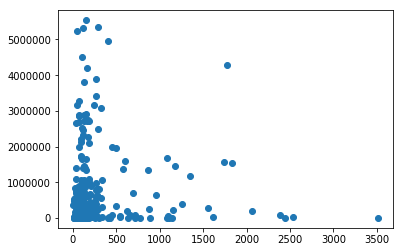

In [148]:
overlap_avg = pd.DataFrame()
overlap_avg["name"] = overlap["name"]
overlap_avg["reviews"] = (overlap["reviews_apple"]+overlap["reviews_google"])/2
overlap_avg["rating"] = (overlap["rating_apple"]+overlap["rating_google"])/2
overlap_avg["profit"] = (overlap["profit_apple"]+overlap["profit_google"])/2
overlap_avg["price"] = (overlap["price_apple"]+overlap["price_google"])/2
overlap_avg["category"] = (overlap["category_apple"])
overlap_avg["size"] = (overlap["size_apple"])
overlap_avg
overlap_avg = overlap_avg[overlap_avg["reviews"]<6000000]
plt.scatter(overlap_avg["size"],overlap_avg["reviews"])

In [149]:
bins = [0, 0.99, 2.99, 4.99, 10.99, 14.99, 29.99]
labels = ['Under 0.99', '0.99-2.99', '2.99 - 4.99', '4.99-10.99', '10.99-14.99', '14.99-29.99']
overlap_paid = overlap_avg[overlap_avg["price"]!=0]
overlap_paid["profit"] = overlap_paid["price"]*overlap_paid["reviews"]
overlap_paid["price_range"] = pd.cut(overlap_paid["price"],bins = bins, labels=labels)

C:\Users\DQ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\DQ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [150]:
overlap_paid

,name,reviews,rating,profit,price,category,size,price_range
10,Doodle Jump,739416.0,4.40,366010.9200,0.495,Games,48.741376,Under 0.99
32,Pocket Yoga,3291.0,4.45,9840.0900,2.990,Health & Fitness,132.480000,0.99-2.99
34,F-Sim Space Shuttle,5915.0,4.45,29515.8500,4.990,Games,76.394496,2.99 - 4.99
39,Fruit Ninja Classic,391992.0,4.40,584068.0800,1.490,Games,104.590336,0.99-2.99
49,Paprika Recipe Manager,1511.5,4.30,7542.3850,4.990,Food & Drink,10.432512,2.99 - 4.99
53,NBA JAM by EA SPORTS™,39046.0,4.15,194839.5400,4.990,Games,410.202112,2.99 - 4.99
55,Puffin Browser Pro,12906.0,3.75,51494.9400,3.990,Utilities,63.474688,2.99 - 4.99
57,Mad Skills Motocross,20931.5,4.25,10361.0925,0.495,Games,16.949248,Under 0.99
66,Dude Perfect,4930.0,4.50,2440.3500,0.495,Games,140.165120,Under 0.99
77,Where's My Water?,160198.0,4.60,318794.0200,1.990,Games,90.853376,0.99-2.99


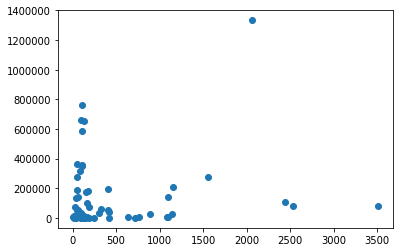

In [160]:
plt.scatter(overlap_paid["size"],overlap_paid["profit"])

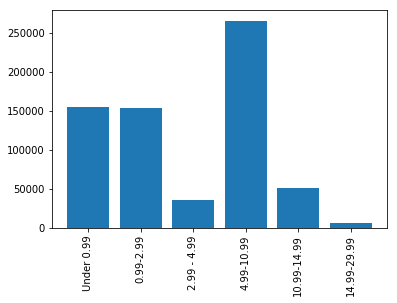

In [152]:
df = overlap_paid.groupby("price_range")["profit"].mean()
plt.bar(df.index.values,df)
plt.xticks(rotation = 90);

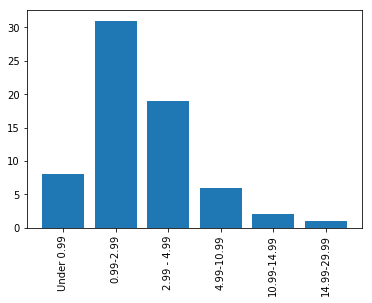

In [153]:
df = overlap_paid.groupby("price_range")["profit"].count()
plt.bar(df.index.values,df)
plt.xticks(rotation = 90);

In [154]:
price_range_df = overlap_paid[overlap_paid["price_range"]=="4.99-10.99"]
price_range_df

,name,reviews,rating,profit,price,category,size,price_range
106,Baldur's Gate: Enhanced Edition,10777.5,4.25,107667.225,9.99,Games,2441.125888,4.99-10.99
190,Grand Theft Auto: San Andreas,190747.5,4.20,1333325.025,6.99,Games,2060.416000,4.99-10.99
210,XCOM®: Enemy Within,8303.5,4.10,82951.965,9.99,Games,3508.826112,4.99-10.99
228,My Movies Pro - Movie & TV Collection Library,3893.0,4.55,31105.070,7.99,Catalogs,95.249408,4.99-10.99
306,RollerCoaster Tycoon® Classic,6294.5,4.30,37704.055,5.99,Games,424.826880,4.99-10.99
313,The EO Bar,331.5,4.85,2317.185,6.99,Health & Fitness,41.403392,4.99-10.99


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

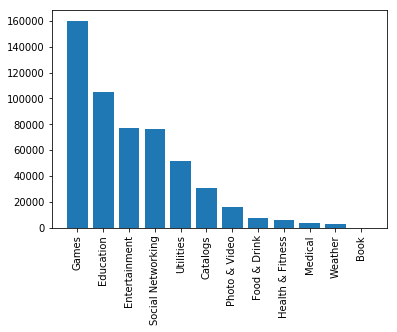

In [155]:
df = overlap_paid.groupby("category")["profit"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

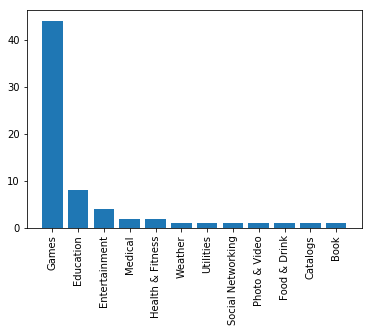

In [156]:
df = overlap_paid.groupby("category")["profit"].count().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation = 90)

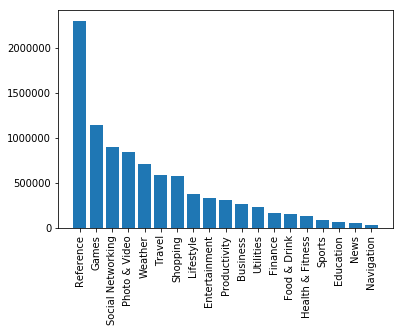

In [157]:
overlap_free = overlap_avg[overlap_avg["price"]==0]
df = overlap_free.groupby("category")["reviews"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation=90);

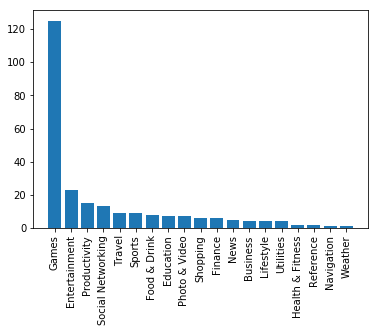

In [158]:
df = overlap_free.groupby("category")["reviews"].count().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xticks(rotation=90);

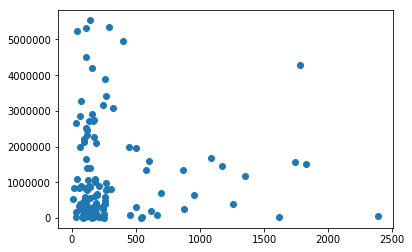

In [159]:
df = overlap_free[overlap_free["category"]=="Games"]
plt.scatter(df["size"],df["reviews"])